# Cairo, Reproducing experimental data

In this script, I will build a 5x5 plaquette ice in order to have the same structure as in experimemtal realizations. I will leave the boundaries free to fully reproduce experimental conditions. The idea is to analyze the data with poor statistics and high statistics in order to observe if something changes. Also with this simulations we pretend to elucidate if radial polarization and charge accumulation at the boundaries is generating the end of the inverse charge transfer effect observed in bigger systems. 

In [1]:
import os
import sys
import numpy as np
from importlib import reload  
import support as sup
reload(sup)
sys.path.insert(0, '../icenumerics')

import icenumerics as ice

from icenumerics.geometry import ordering 
import magcolloids as mgc

import matplotlib.pyplot as plt
ureg = ice.ureg
from string import Template

%load_ext autoreload
%autoreload 2

In [2]:
output = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-15.1"

In [3]:
np.random.seed()

l = 3
a = 19.5458*ureg.um
sp = sup.spins()
ureg = ice.ureg
sp.create_lattice(geometry = "cairo",size =[l,l],lattice_constant=19.5458*ureg.um, border="periodic")
sp.order_spins(ordering.random_ordering)

/home/carolina/CairoLattice_ACI_PROJECT/Scripts/support.py:283: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new_centers[:,1] = centersY


(-33.02237346328719, 264.7822799237229, -264.7822799237229, 33.02237346328718)

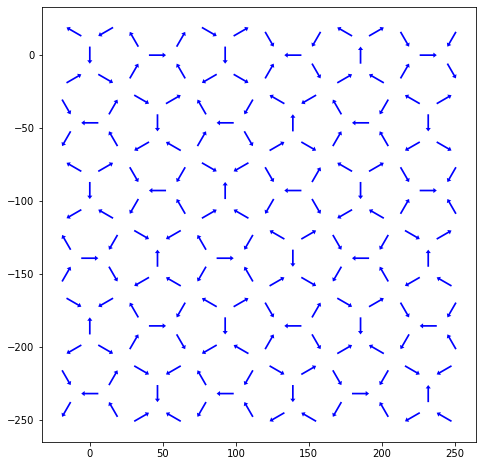

In [4]:
f, (ax1) = plt.subplots(1,1,figsize = (8,8))
sp.display(ax1)
plt.axis('square')

In [5]:
particle = ice.particle(radius = 5*ureg.um,
             susceptibility = 0.005,
             diffusion = 0.125*ureg.um**2/ureg.s,
             temperature = 300*ureg.K,
             density = 1000*ureg.kg/ureg.m**3)

trap_long = ice.trap(trap_sep = 10*ureg.um,
               height = 30*ureg.pN*ureg.nm,
               stiffness = 0.1*ureg.fN/ureg.nm)

trap_short = ice.trap(trap_sep = 4.5258*ureg.um,
               height = 30*ureg.pN*ureg.nm,
               stiffness = 0.1*ureg.fN/ureg.nm)

traps = []

In [6]:
a = 19.5458*ureg.um 

for s in sp:
    
    if ( s.direction[0].magnitude == a.magnitude or s.direction[0].magnitude == -a.magnitude or 
        s.direction[1].magnitude == a.magnitude or s.direction[1].magnitude == -a.magnitude ):
        
        traps.append(trap_short)
        
    else:
        
        traps.append(trap_long)

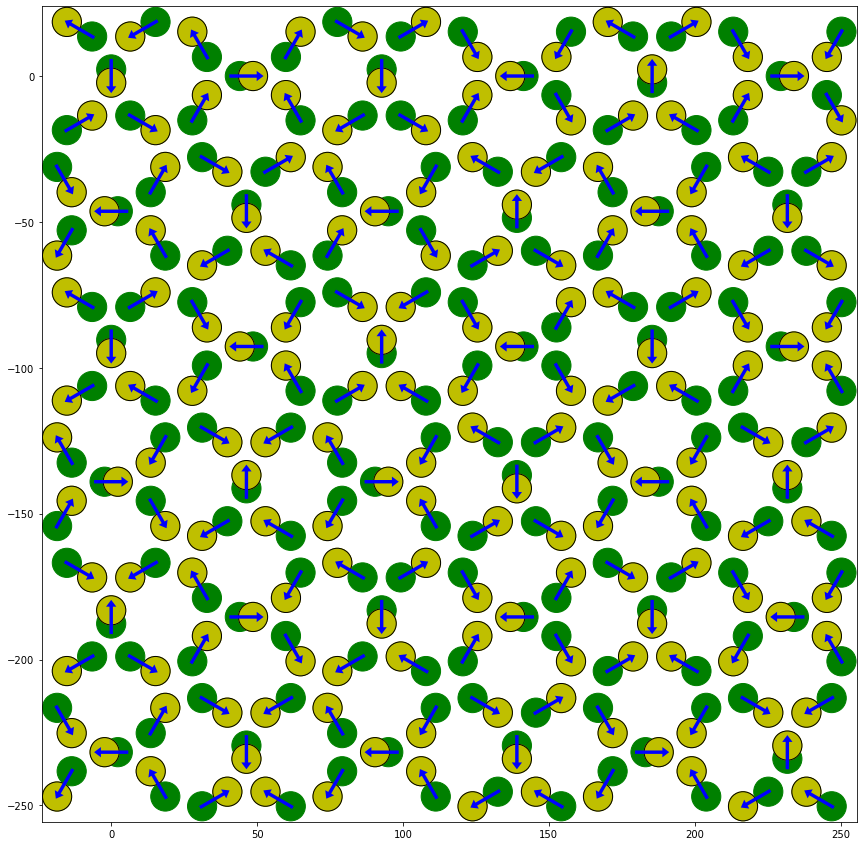

In [7]:
col = ice.colloidal_ice(sp, particle, traps, height_spread = 0, susceptibility_spread = 0.1)

col.pad_region(7.1539*ureg.um) # Parameter obtained by geometric restrictions.

f, (ax1) = plt.subplots(1,1,figsize = (15,15))
col.display(ax1)
sp.display(ax1)

In [8]:
world = ice.world(
    field = 30*ureg.mT,
    temperature = 300*ureg.K,
    dipole_cutoff = 200*ureg.um)

total_time = 1000*ureg.s
col.simulate(world,
             name = 'test',
             #name = "MimicExperimentalData_CairoLattice_25mT-1000s_EXP30",
             include_timestamp = False,
             targetdir = output,
             framerate = 1*ureg.Hz,
             timestep = 10*ureg.ms,
             run_time = total_time,
             output = ["x","y","z","mux","muy","muz"])

scanning file


In [9]:
col.sim.field.fieldz = "v_Bmag*time/%f"%(total_time.to(ureg.us).magnitude)
col.run_simulation()

In [10]:
col.load_simulation(slice(0,None,1))

scanning file


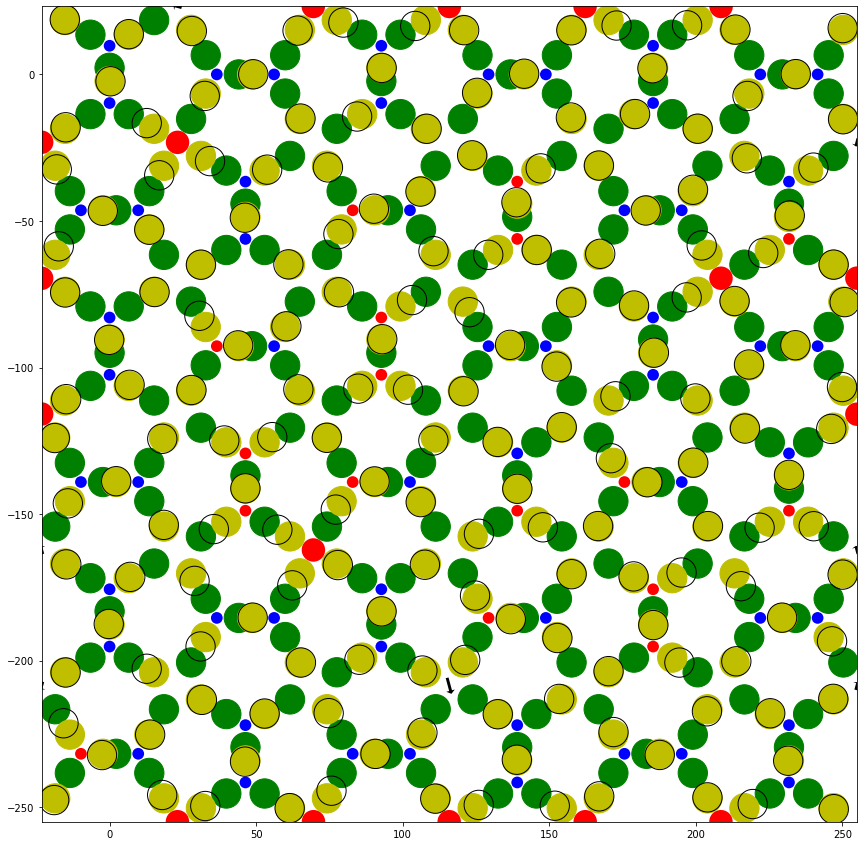

In [11]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
v = ice.vertices()
col.set_state_from_frame(-1)
v = v.colloids_to_vertices(col)

col.display(ax1)
v.display(ax1)

In [12]:
v.vertices

,x,y,coordination,charge,dx,dy
0,0.000000,-9.772900,3,-1,0.000000,-2.000000
1,0.000000,9.772900,3,-1,-1.732051,-1.000000
2,115.853423,-254.928788,2,2,-0.366025,-1.366025
3,139.055944,-241.532806,3,-1,0.000000,-2.000000
4,195.180825,-231.759906,3,-1,2.000000,0.000000
...,...,...,...,...,...,...
112,-23.168882,-208.557385,2,0,-0.366025,-1.366025
113,69.501441,23.168882,2,2,-0.366025,1.366025
114,69.554502,-254.928788,2,2,0.366025,-1.366025
115,162.205404,23.168882,2,2,-0.366025,1.366025


# Loop

In [ ]:
for i in range(20,40):
    
    np.random.seed()

    l = 3
    a = 19.5458*ureg.um
    sp = sup.spins()
    ureg = ice.ureg
    sp.create_lattice(geometry = "cairo",size =[l,l],lattice_constant=19.5458*ureg.um, border="periodic")
    sp.order_spins(ordering.random_ordering)
    sp.order_spins(ordering.random_ordering)
    
    particle = ice.particle(radius = 5*ureg.um,
             susceptibility = 0.005,
             diffusion = 0.125*ureg.um**2/ureg.s,
             temperature = 300*ureg.K,
             density = 1000*ureg.kg/ureg.m**3)

    trap_long = ice.trap(trap_sep = 10*ureg.um,
                   height = 30*ureg.pN*ureg.nm,
                   stiffness = 0.1*ureg.fN/ureg.nm)

    trap_short = ice.trap(trap_sep = 4.5258*ureg.um,
                   height = 30*ureg.pN*ureg.nm,
                   stiffness = 0.1*ureg.fN/ureg.nm)

    traps = []
    
    for s in sp:

        if ( s.direction[0].magnitude == a.magnitude or s.direction[0].magnitude == -a.magnitude or 
            s.direction[1].magnitude == a.magnitude or s.direction[1].magnitude == -a.magnitude ):

            traps.append(trap_short)

        else:

            traps.append(trap_long)
            
    col = ice.colloidal_ice(sp, particle, traps, height_spread = 0, susceptibility_spread = 0.1)

    col.pad_region(7.1539*ureg.um) # Parameter obtained by geometric restrictions.
    
    world = ice.world(
    field = 25*ureg.mT,
    temperature = 300*ureg.K,
    dipole_cutoff = 200*ureg.um)

    total_time = 1000*ureg.s
    col.simulate(world,
                 name = "MimicExperimentalData_CairoLattice_25mT-1000s_6x6_EXP"+str(i),
                 include_timestamp = False,
                 targetdir = output,
                 framerate = 1*ureg.Hz,
                 timestep = 10*ureg.ms,
                 run_time = total_time,
                 output = ["x","y","z","mux","muy","muz"])
    
    col.sim.field.fieldz = "v_Bmag*time/%f"%(total_time.to(ureg.us).magnitude)
    col.run_simulation()
    col.load_simulation(slice(0,None,1))

/home/carolina/CairoLattice_ACI_PROJECT/Scripts/support.py:283: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new_centers[:,1] = centersY


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file


scanning file
